In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
gg_df = pd.read_csv('../Data Preprocessing/myGooglePlay_clean.csv')
#gg_df = pd.read_csv('../Data Preprocessing/myGooglePlay_new_clean.csv')
ap_df = pd.read_csv('../Data Preprocessing/myAppleStore_clean.csv')
it_df = pd.read_csv('../Data Preprocessing/myAppleStore_new_clean.csv')

# Comparison of same app
We pick those apps which are downloadable from both stores and compare their size, ratings, etc

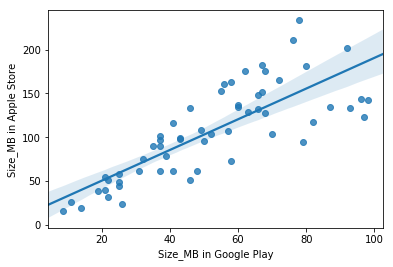

In [252]:
mrg = pd.merge(gg_df, it_df, on=['App'], how='inner')
mrg.rename(columns={'Size_M_x':'Size_MB in Google Play','Size_M_y':'Size_MB in Apple Store',\
                    'Rating_x':'Rating in Google Play','Rating_y':'Rating in Apple Store',\
                    'Category_y':'Category'},inplace=True)
mrg = mrg[mrg['Size_MB in Google Play']!=0]
mrg['Size_rate'] = mrg['Size_MB in Apple Store']/mrg['Size_MB in Google Play']
mrg = mrg[mrg['Size_rate']<3]
sns.regplot(x = 'Size_MB in Google Play', y = 'Size_MB in Apple Store', data = mrg);

,Unnamed: 0_x,App,Category_x,Size_MB in Google Play,Price_x,Rating in Google Play,Tag_x,Unnamed: 0_y,Category,Size_MB in Apple Store,Price_y,Rating in Apple Store,Tag_y,Size_rate,Rating_rate
187,2795,The Home Depot,Shopping,56.0,0.0,4.3,Google,5089,Shopping,160.2,0.0,4.7,Apple,2.860714,1.093023
269,4067,E! News,News,25.0,0.0,4.0,Google,4364,News,57.8,0.0,4.8,Apple,2.312000,1.200000
274,4587,Tinder,Lifestyle,68.0,0.0,4.0,Google,3129,Lifestyle,175.8,0.0,3.8,Apple,2.585294,0.950000
69,1167,Discover Mobile,Finance,68.0,0.0,4.6,Google,2024,Finance,127.3,0.0,4.8,Apple,1.872059,1.043478
157,2007,Jetpack Joyride,Games,96.0,0.0,4.4,Google,4819,Games,143.2,0.0,4.5,Apple,1.491667,1.022727
116,1689,Hill Climb Racing,Games,63.0,0.0,4.4,Google,2826,Games,128.6,0.0,4.5,Apple,2.041270,1.022727
113,1681,Flow Free,Games,11.0,0.0,4.3,Google,1696,Games,26.4,0.0,4.6,Apple,2.400000,1.069767
65,1160,U.S. Bank,Finance,50.0,0.0,4.1,Google,163,Finance,96.3,0.0,4.8,Apple,1.926000,1.170732
97,1579,Safeway,Lifestyle,37.0,0.0,4.3,Google,5247,Shopping,61.6,0.0,4.7,Apple,1.664865,1.093023
106,1665,Angry Birds Rio,Games,46.0,0.0,4.4,Google,2654,Games,133.7,0.0,4.6,Apple,2.906522,1.045455


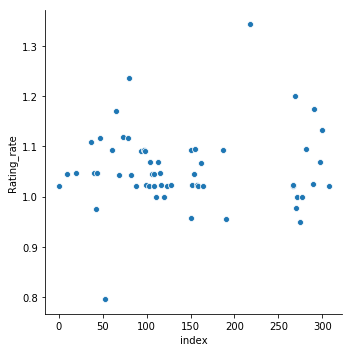

In [253]:
mrg['Rating_rate'] = mrg['Rating in Apple Store']/mrg['Rating in Google Play']
sns.relplot(x='index', y='Rating_rate', data = mrg.reset_index());
mrg.sample(55)

# Comparison of statistics
We compare some statistics from the two datasets.

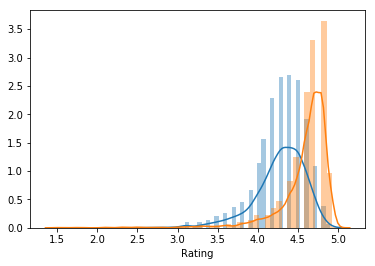

In [248]:
fig, ax = plt.subplots()
sns.distplot(gg_df['Rating'], ax=ax, label='Google Play');
sns.distplot(it_df['Rating'], ax=ax, label='Apple Store');

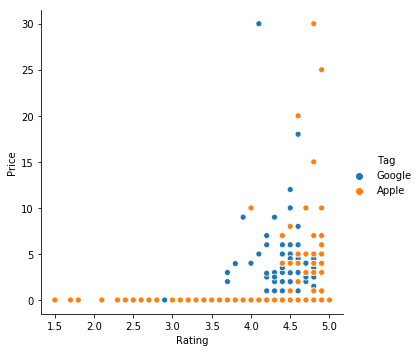

In [249]:
gg_df['Tag'] = 'Google'
it_df['Tag'] = 'Apple'
lg = gg_df.append(it_df)
sns.relplot(x='Rating', y='Price', hue='Tag', data = lg[lg['Price']<30]);